# **0. Setup**

## 0.1. Library and Environment

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

np.random.seed(42)
pd.set_option("display.max_columns", None)

FIG_DIR = "fig"

## 0.2. Data Loading

In [144]:
data = yfinance.download(
    tickers = "^GSPC",
    start = "1900-01-01",
    end = "2025-01-01",
    interval = "1wk"
)
data.columns = data.columns.get_level_values(0)
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.reset_index(inplace=True)
data.columns.name = None
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipykernel_639723/929975380.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [145]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## 0.3. Data Augmentation

# **1. EDA**

## 1.1. Data Summary

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5062 non-null   datetime64[ns]
 1   Open    5062 non-null   float64       
 2   High    5062 non-null   float64       
 3   Low     5062 non-null   float64       
 4   Close   5062 non-null   float64       
 5   Volume  5062 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 237.4 KB


In [148]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,5062,5062.000000,5062.000000,5062.000000,5062.000000,5.062000e+03
mean,1976-07-01 03:00:21.335440544,657.075699,666.792989,647.089796,658.260721,4.424252e+09
min,1927-12-26 00:00:00,4.440000,4.600000,4.400000,4.410000,0.000000e+00
25%,1952-04-01 18:00:00,24.602500,24.809999,24.410000,24.714999,7.812500e+06
50%,1976-07-01 12:00:00,102.309998,103.890003,100.855000,102.309998,9.735500e+07
75%,2000-09-30 06:00:00,1045.222504,1070.459991,1028.357513,1048.192474,4.890750e+09
max,2024-12-30 00:00:00,6083.009766,6099.970215,6033.390137,6090.270020,4.664107e+10
std,NaN,1085.118213,1100.712655,1069.613477,1087.631094,7.820851e+09


In [139]:
data.head(1)

,Date,Open,High,Low,Close,Volume
0,1927-12-26,17.66,17.66,17.66,17.66,0


## 1.2. Preprocessing

In [140]:
print(f"Null value check: \n{data.isna().sum()}")

Null value check: 
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [141]:
duplicate_count = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


## 1.3. Statistical Analysis

In [150]:
def statistical_analysis(df: pd.DataFrame) -> dict:
    result = {
        "mean": df.mean(),
        "median": df.median(),
        "std": df.std(),
        "min": df.min(),
        "max": df.max(),
        "q1": df.quantile(0.25),
        "q3": df.quantile(0.75),
        "iqr": df.quantile(0.75) - df.quantile(0.25)
    }

    return result

stats_summary = pd.DataFrame({
    col: statistical_analysis(data[col])
    for col in data.select_dtypes(include='number').columns
})
print(stats_summary)

               Open         High          Low        Close        Volume
mean     657.075699   666.792989   647.089796   658.260721  4.424252e+09
median   102.309998   103.890003   100.855000   102.309998  9.735500e+07
std     1085.118213  1100.712655  1069.613477  1087.631094  7.820851e+09
min        4.440000     4.600000     4.400000     4.410000  0.000000e+00
max     6083.009766  6099.970215  6033.390137  6090.270020  4.664107e+10
q1        24.602500    24.809999    24.410000    24.714999  7.812500e+06
q3      1045.222504  1070.459991  1028.357513  1048.192474  4.890750e+09
iqr     1020.620003  1045.649992  1003.947514  1023.477475  4.882938e+09


## 1.4. Visualization

### 1.4.1. Candlestick Chart
Candlestick charts are a classic tool in financial analysis, helping to easily identify trends, fluctuations and market sentiment in each session.


In [143]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Candlestick(
        x=data['time'],
        open=data['open'],
        high=data['high'],
        low=data['low'],
        close=data['close'],
        name='Price'
    ),
    secondary_y=True
)

fig.add_trace(
    go.Bar(
        x=data['time'],
        y=data['volume'],
        name='Volume',
        marker_color='blue',
        opacity=1
    ),
    secondary_y=False
)

fig.update_yaxes(showgrid=False, secondary_y=True)
fig.update_layout(
    title='VCB Stock Price in Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Volume',
    yaxis2_title='Price',
    xaxis_rangeslider_visible=False,
    template='seaborn'
)

fig.show()

KeyError: 'time'

### 1.4.2. Boxplot

Boxplots help detect outlier data, an important step in EDA to ensure that the subsequent analysis model is not affected by unusual values.

/tmp/ipykernel_639723/3929194749.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




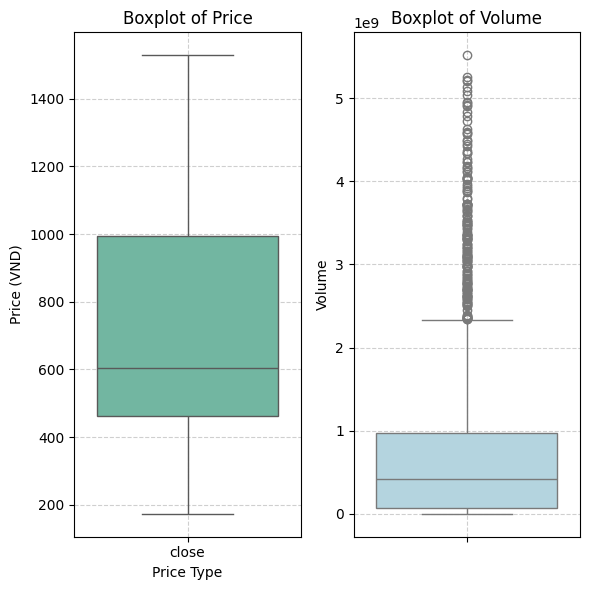

In [64]:
cols = ["close"]

data_melted = data.melt(value_vars=cols, var_name="Price Type", value_name="Price")
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

sns.boxplot(
    x="Price Type", y="Price", data=data_melted,
    ax=axes[0], palette="Set2", order=cols
)
axes[0].set_title("Boxplot of Price")
axes[0].set_ylabel("Price (VND)")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.boxplot(
    y=data["volume"], color="lightblue", ax=axes[1]
)
axes[1].set_title("Boxplot of Volume")
axes[1].set_xlabel("")
axes[1].set_ylabel("Volume")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()

box_path = os.path.join(FIG_DIR, "boxplot.png")
plt.savefig(box_path, dpi=150)
plt.show()
plt.close()

### 1.4.3. Histogram

Histogram is the basic chart to identify the distribution of data.

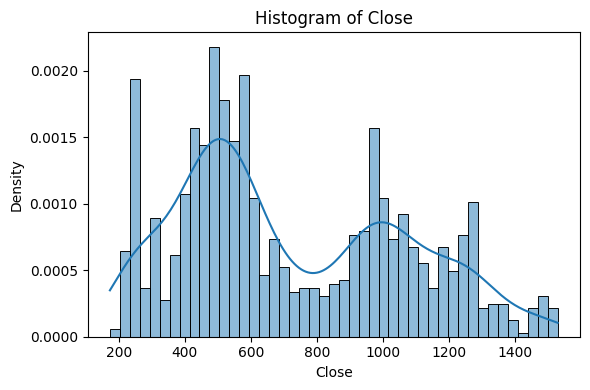

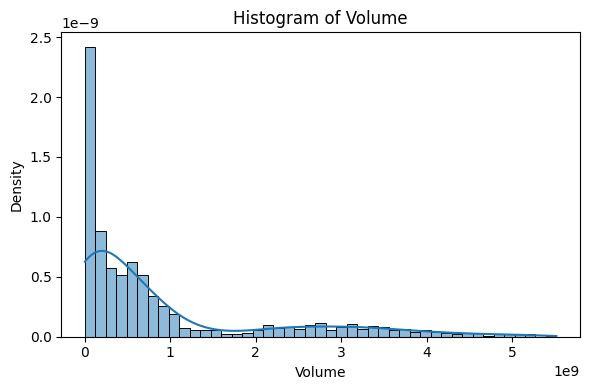

In [65]:
cols = ["close", "volume"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col].dropna(), kde=True, stat="density", bins=45)
    plt.title(f"Histogram of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Density")
    plt.tight_layout()

    hist_path = os.path.join(FIG_DIR, f"hist_{col}.png")
    plt.savefig(hist_path, dpi=150)
    plt.show()
    plt.close()


### 1.4.4. Line Chart

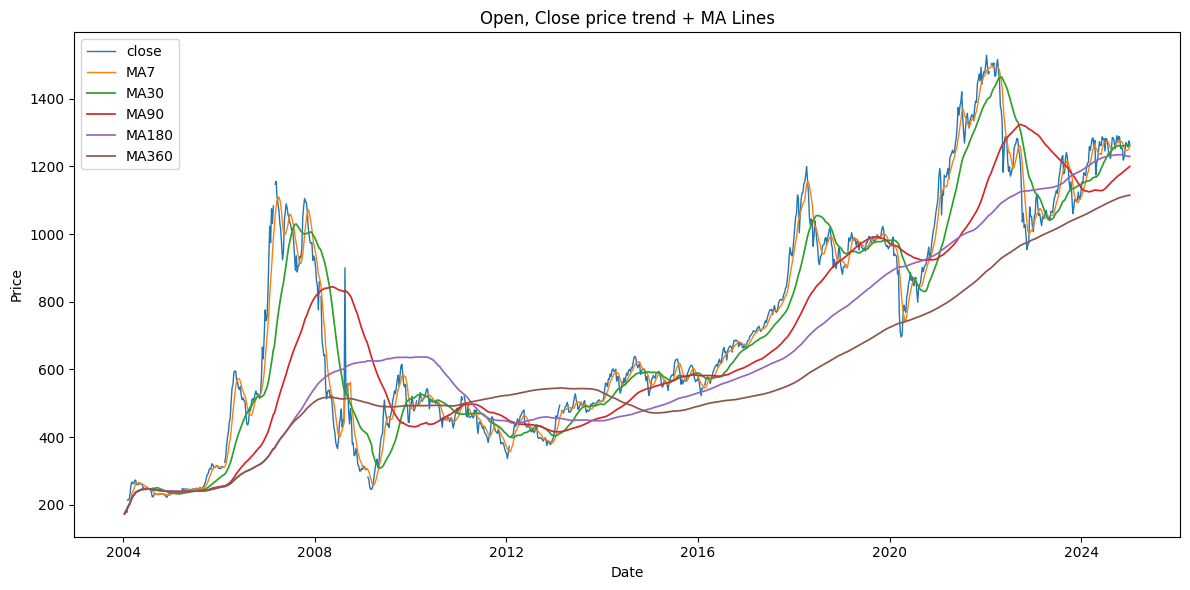

In [66]:
df_ext = data.copy()
# df_ext = df_ext[df_ext['time'] > "2024-01-01"]
df_ext["MA7"] = df_ext["close"].rolling(window=7, min_periods=1).mean()
df_ext["MA30"] = df_ext["close"].rolling(window=30, min_periods=1).mean()
df_ext["MA90"] = df_ext["close"].rolling(window=90, min_periods=1).mean()
df_ext["MA180"] = df_ext["close"].rolling(window=180, min_periods=1).mean()
df_ext["MA360"] = df_ext["close"].rolling(window=360, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(df_ext["time"], df_ext["close"], label="close", linewidth=1)
plt.plot(df_ext["time"], df_ext["MA7"], label="MA7", linewidth=1)
plt.plot(df_ext["time"], df_ext["MA30"], label="MA30", linewidth=1.25)
plt.plot(df_ext["time"], df_ext["MA90"], label="MA90", linewidth=1.25)
plt.plot(df_ext["time"], df_ext["MA180"], label="MA180", linewidth=1.25)
plt.plot(df_ext["time"], df_ext["MA360"], label="MA360", linewidth=1.25)

plt.title("Open, Close price trend + MA Lines")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()
line_path = os.path.join(FIG_DIR, "line_trend.png")
plt.savefig(line_path, dpi=150)
plt.close()

### 1.4.5. Heatmap

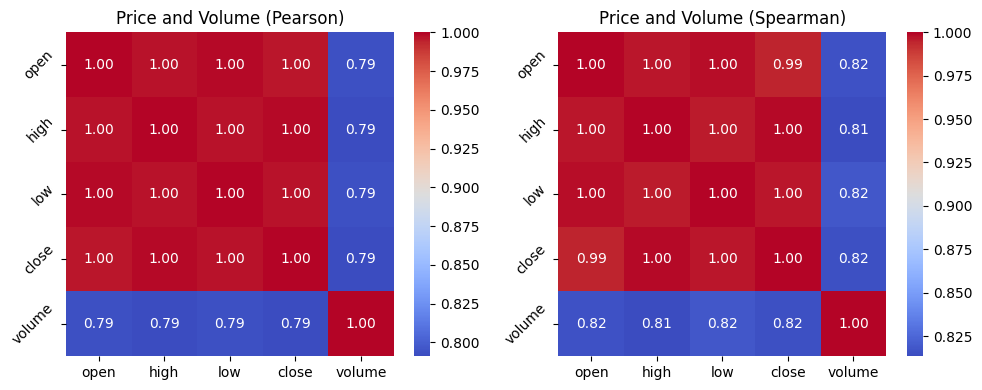

In [67]:
corr_pear = data[["open", "high", "low", "close", "volume"]].corr(method="pearson")
corr_spear = data[["open", "high", "low", "close", "volume"]].corr(method="spearman")

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.heatmap(corr_pear, annot=True, cmap="coolwarm", fmt=".2f")
plt.yticks(rotation=(45))
plt.title("Price and Volume (Pearson)")

plt.subplot(1, 2, 2)
sns.heatmap(corr_spear, annot=True, cmap="coolwarm", fmt=".2f")
plt.yticks(rotation=(45))
plt.title("Price and Volume (Spearman)")

plt.tight_layout()
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

X = data[['open','high','low','close','volume']].dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature          VIF
0    open  5612.936323
1    high  8883.289305
2     low  5447.216576
3   close  8258.808590
4  volume     2.984465
